# Final Project Report

* Class: DS 5100
* Student Name: Katie Dunning
* Student Net ID: umu5hh
* This URL: https://github.com/KDunning0/DS5100FinalProject/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/KDunning0/DS5100FinalProject

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [ ]:
'''
import numpy as np
import pandas as pd

class Die():
    """Creates a die object with weights that can be rolled."""
    def __init__(self,N):
        """Creates an instance of the die.
        input=N, a numpy array of die faces (numeric or alphabetic).
        Creates=Weights, a numpy array of uniform weights for each face.
        die_frame, a pd dataframe of faces/sides and weights"""
        if not isinstance(N,np.ndarray):
            raise TypeError("N must be a numpy array.")
        if len(np.unique(N)) != len(N):
            raise ValueError("Numbers must be distinct.")
        self.faces=N
        self.weights=np.array([1.0 for num in range(len(N))])
        self.die_frame=pd.DataFrame({'sides':self.faces,'weights':self.weights}).set_index('sides')
    def change_weight(self,num_face,num_weight):
        """Changes the weight of a single die face.
        input=num_face, a single member of self.faces.
        num_weight, integer or float to replace weight of num_face
        Changes=Alters the weight within self.die_frame"""
        if num_face not in self.faces:
            raise IndexError("Face not in dice faces.")
        if not isinstance(num_weight,(int,float)) and num_weight.lstrip('-').replace('.','').isdigit()==False:
            raise TypeError("Not a number and/or can't become a number.")
        new_weight=float(num_weight)
        self.die_frame.loc[num_face]=new_weight
        self.weights=np.array(self.die_frame.iloc[:,0])
    def roll_die(self,rolls=1):
        """Rolls the dice a set number of times.
        default=rolls, integer, rolls 1 time.
        input=rolls, integer, the number of times the die is rolled.
        returns=temp_roll_holder, list, the die face rolled for each roll"""
        temp_roll_holder=[]
        for i in range(rolls):
            new_roll=self.die_frame.sample(weights=self.weights).index[0]
            temp_roll_holder.append(new_roll)
        return temp_roll_holder
    def show_die(self):
        """Shows the die object in its current state
        returns=self.die_frame, pd Dataframe, faces/sides and weights of the die"""
        return self.die_frame
    
class Game():
    """Creates a Game object for rolling multiple dice with the same side/face count."""
    def __init__(self,dice_list):
        """Creates an instance of the Game object
        input=dice_list, list, a list of already instanced Die objects with same face/side count
        creates=self.game_dice, list, originally dice_list"""
        self.game_dice=dice_list
    def play(self,roll_num):
        """Rolls the dice in self.game_dice a set number of times, then stores results
        input=roll_num, integer, a number of time for all dice to be rolled
        creates=self.play_run, pd DataFrame, stores the faces rolled for each die for each roll"""
        self.play_run=pd.DataFrame()
        for i, dice in enumerate(self.game_dice):
            self.play_run[i]=pd.DataFrame(dice.roll_die(roll_num))
        self.play_run.index=range(1, len(self.play_run)+1)
        self.play_run.index.name='Roll Num'
    def narrow_or_wide(self,ans):
        """Displays self.play_run in either wide or narrow orientation
        input=ans, string, the value 'narrow' or 'wide' depending on desired table.
        return=self.narrow_tab, pd DataFrame, a narrow version of self.play_run if 'narrow' is selected.
        self.play_run, pd DataFrame, returns self.play_run unchanged if 'wide' is selected."""
        if not isinstance(ans,str):
            raise ValueError("Not a string.")
        if ans.lower() != 'narrow' and ans.lower() != 'wide':
            raise ValueError("Please enter narrow or wide.")
        if ans.lower() == 'narrow':
            self.narrow_tab=self.play_run.stack().to_frame('Outcome')
            return self.narrow_tab
        if ans.lower() == 'wide':
            return self.play_run

class Analyzer():
    """Computes the statsitics of a single Game object."""
    def __init__(self,game_obj):
        """Creates an instance of Analyzer
        input=game_obj, an instance of class Game
        creates=self.gameobj, stores game_obj
        self.dieface, np array, stores the faces present on a die"""
        if not isinstance(game_obj,Game):
            raise ValueError("Not a game object.")
        self.gameobj=game_obj
        self.dieface=game_obj.game_dice[0].faces
    def jackpot(self):
        """Outputs an integer with the number of rolls where all dice equal the same face.
        return=count, integer, the number of rolls where all dice equal the same face."""
        count=0
        for ind, row in self.gameobj.play_run.iterrows():
            if len(pd.unique(row.values))==1:
                count+=1
        return count
    def face_count(self):
        """Counts the number of times all faces/sides appear in each roll of all dice
        return=fa_count, pd DataFrame, the counts for all faces for each roll of all dice"""
        fa_count=pd.DataFrame(index=self.gameobj.play_run.index)
        for face in self.dieface:
            fa_count[face]=self.gameobj.play_run.apply(lambda r:(r==face).sum(),axis=1)
        return fa_count
    def combo_count(self):
        """Returns a combination count table of face rolls and the number of times occurred.
        return=row_tup_combo, pd DataFrame, the combo counts for each tuple."""
        row_tup=[tuple(sorted(self.gameobj.play_run.loc[i])) for i in self.gameobj.play_run.index]
        row_tup_combo=pd.DataFrame.from_dict({tuple_combo: row_tup.count(tuple_combo) for tuple_combo in list(set(row_tup))},orient='index')
        row_tup_combo.index=pd.MultiIndex.from_tuples(row_tup_combo.index)
        row_tup_combo=row_tup_combo.rename(columns={0:'Combo Count'})
        return row_tup_combo
    def permute_count(self):
        """Returns a permutation count table of face rolls and the number of times occurred.
        return=row_tup_perm, pd DataFrame, the permutation counts for each tuple."""
        row_tup=[tuple(self.gameobj.play_run.loc[i]) for i in self.gameobj.play_run.index]
        row_tup_perm=pd.DataFrame.from_dict({tuple_perm: row_tup.count(tuple_perm) for tuple_perm in list(set(row_tup))},orient='index')
        row_tup_perm.index=pd.MultiIndex.from_tuples(row_tup_perm.index)
        row_tup_perm=row_tup_perm.rename(columns={0:'Permute Count'})
        pd.set_option('display.multi_sparse',False)
        return row_tup_perm
'''

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
'''
import unittest
import numpy as np
import pandas as pd
from MonteCarlo.ProjClasses import Die, Game, Analyzer

class DieTestSuite(unittest.TestCase):
    def test_01_init(self):
        self.assertRaises(TypeError, Die, 8)
    def test_02_change_weight(self):
        Num=np.array([1,2,3,4,5,6])
        new_die=Die(Num)
        self.assertRaises(IndexError, new_die.change_weight, 8, 1.5)
    def test_03_roll_die(self):
        Num=np.array([1,2,3,4,5,6])
        new_die=Die(Num)
        new_roll=new_die.roll_die(3)
        self.assertEqual(len(new_roll),3)
        self.assertIsInstance(new_roll,list)
    def test_04_show_die(self):
        Num=np.array([1,2,3,4,5,6])
        new_die=Die(Num)
        new_die_show=new_die.show_die()
        self.assertEqual(len(new_die_show),6)
        self.assertIsInstance(new_die_show,pd.DataFrame)
class GameTestSuite(unittest.TestCase):
    def test_05_init(self):
        Num=np.array([1,2,3,4,5,6])
        new_die=Die(Num)
        new_die2=Die(Num)
        dice_list=[new_die,new_die2]
        new_game=Game(dice_list)
        self.assertEqual(len(new_game.game_dice),2)
        self.assertIsInstance(new_game,Game)
    def test_06_play(self):
        Num=np.array([1,2,3,4,5,6])
        new_die=Die(Num)
        new_die2=Die(Num)
        dice_list=[new_die,new_die2]
        new_game=Game(dice_list)
        new_game.play(10)
        self.assertEqual(len(new_game.play_run),10)
        self.assertEqual(len(new_game.play_run.columns),2)
        self.assertIsInstance(new_game.play_run,pd.DataFrame)
    def test_07_nar_or_wide(self):
        Num=np.array([1,2,3,4,5,6])
        new_die=Die(Num)
        new_die2=Die(Num)
        dice_list=[new_die,new_die2]
        new_game=Game(dice_list)
        new_game.play(10)
        self.assertRaises(ValueError, new_game.narrow_or_wide, 8)
        self.assertRaises(ValueError, new_game.narrow_or_wide, "Spaghetti")
class AnalyzerTestSuite(unittest.TestCase):
    def test_08_init(self):
        self.assertRaises(ValueError, Analyzer, 8)
    def test_09_jackpot(self):
        Num=np.array([1,2,3,4,5,6])
        new_die=Die(Num)
        new_die.change_weight(1,0)
        new_die.change_weight(2,0)
        new_die.change_weight(3,0)
        new_die.change_weight(4,0)
        new_die.change_weight(5,0)
        new_die2=Die(Num)
        new_die2.change_weight(1,0)
        new_die2.change_weight(2,0)
        new_die2.change_weight(3,0)
        new_die2.change_weight(4,0)
        new_die2.change_weight(5,0)
        dice_list=[new_die,new_die2]
        new_game=Game(dice_list)
        new_game.play(10)
        new_ana=Analyzer(new_game)
        self.assertEqual(new_ana.jackpot(),10)
        self.assertIsInstance(new_ana.jackpot(),int)
    def test_10_facecount(self):
        Num=np.array([1,2,3,4,5,6])
        new_die=Die(Num)
        new_die2=Die(Num)
        dice_list=[new_die,new_die2]
        new_game=Game(dice_list)
        new_game.play(10)
        new_ana=Analyzer(new_game)
        self.assertEqual(len(new_ana.face_count()),10)
        self.assertEqual(len(new_ana.face_count().columns),6)
        self.assertIsInstance(new_ana.face_count(),pd.DataFrame)
    def test_11_combo(self):
        Num=np.array([1,2,3,4,5,6])
        new_die=Die(Num)
        new_die2=Die(Num)
        new_die3=Die(Num)
        dice_list=[new_die,new_die2,new_die3]
        new_game=Game(dice_list)
        new_game.play(10)
        new_ana=Analyzer(new_game)
        self.assertIsInstance(new_ana.combo_count().index,pd.MultiIndex)
        self.assertIsInstance(new_ana.combo_count(),pd.DataFrame)
    def test_12_permu(self):
        Num=np.array([1,2,3,4,5,6])
        new_die=Die(Num)
        new_die2=Die(Num)
        new_die3=Die(Num)
        dice_list=[new_die,new_die2,new_die3]
        new_game=Game(dice_list)
        new_game.play(10)
        new_ana=Analyzer(new_game)
        self.assertIsInstance(new_ana.permute_count().index,pd.MultiIndex)
        self.assertIsInstance(new_ana.permute_count(),pd.DataFrame)
        
if __name__ == '__main__':
    unittest.main(verbosity=3)
'''

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import MonteCarlo.ProjClasses
from MonteCarlo.ProjClasses import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(MonteCarlo.ProjClasses)

Help on module MonteCarlo.ProjClasses in MonteCarlo:

NAME
    MonteCarlo.ProjClasses

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game_obj)
     |  
     |  Computes the statsitics of a single Game object.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game_obj)
     |      Creates an instance of Analyzer
     |      input=game_obj, an instance of class Game
     |      creates=self.gameobj, stores game_obj
     |      self.dieface, np array, stores the faces present on a die
     |  
     |  combo_count(self)
     |      Returns a combination count table of face rolls and the number of times occurred.
     |      return=row_tup_combo, pd DataFrame, the combo counts for each tuple.
     |  
     |  face_count(self)
     |      Counts the number of times all faces/sides appear in each roll of all dice
     |      return=fa_count, pd DataFrame, the counts for all faces for each ro

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/KDunning0/DS5100FinalProject/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
import numpy as np
import pandas as pd

In [4]:
fair_coin=Die(np.array(['H','T']))
unfair_coin=Die(np.array(['H','T']))
unfair_coin.change_weight('H',5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [5]:
coin_list1=[fair_coin,fair_coin]
coin_game1=Game(coin_list1)
n=1000
coin_game1.play(n)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [6]:
coin_list2=[unfair_coin,unfair_coin,fair_coin]
coin_game2=Game(coin_list2)
coin_game2.play(n)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [7]:
new_ana1=Analyzer(coin_game1)
new_ana2=Analyzer(coin_game2)
print(f'Two fair coin Jackpot = {new_ana1.jackpot()}')
print(f'Two unfair and one fair coin Jackpot = {new_ana2.jackpot()}')

Two fair coin Jackpot = 506
Two unfair and one fair coin Jackpot = 384


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [8]:
Trial_1_Jackpot=new_ana1.jackpot()/n
Trial_2_Jackpot=new_ana2.jackpot()/n

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

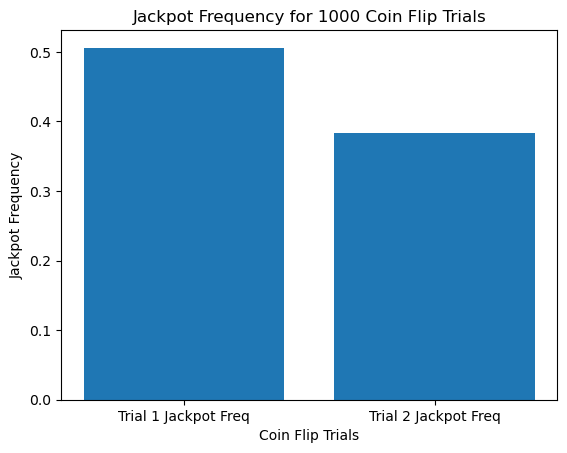

In [9]:
import matplotlib.pyplot as plt
x=['Trial 1 Jackpot Freq','Trial 2 Jackpot Freq']
y=[Trial_1_Jackpot,Trial_2_Jackpot]
plt.bar(x,y)
plt.xlabel('Coin Flip Trials')
plt.ylabel('Jackpot Frequency')
plt.title('Jackpot Frequency for 1000 Coin Flip Trials')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [17]:
die_faces=np.array([1,2,3,4,5,6])
cube_die_1=Die(die_faces)
cube_die_2=Die(die_faces)
cube_die_3=Die(die_faces)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [18]:
cube_die_1.change_weight(6,5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [19]:
cube_die_2.change_weight(1,5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [20]:
cube_die_list=[cube_die_3,cube_die_3,cube_die_3]
cube_game_fair=Game(cube_die_list)
n2=10000
cube_game_fair.play(n2)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [21]:
cube_die_list2=[cube_die_1,cube_die_2,cube_die_3,cube_die_3,cube_die_3]
cube_game_unfair=Game(cube_die_list2)
cube_game_unfair.play(n2)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

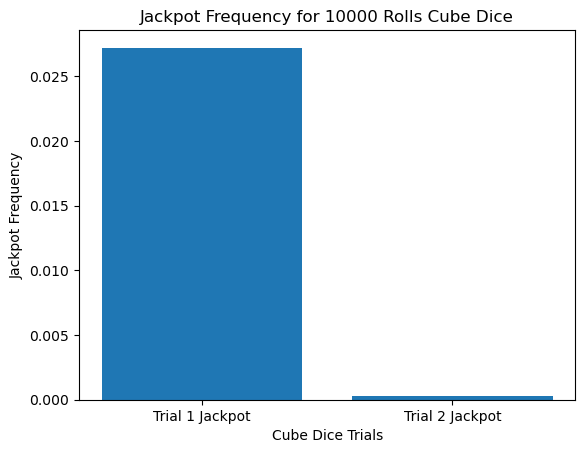

In [23]:
fair_ana=Analyzer(cube_game_fair)
unfair_ana=Analyzer(cube_game_unfair)
Trial_Fair_Jackpot=fair_ana.jackpot()/n2
Trial_Unfair_Jackpot=unfair_ana.jackpot()/n2
x=['Trial 1 Jackpot', 'Trial 2 Jackpot']
y=[Trial_Fair_Jackpot,Trial_Unfair_Jackpot]
plt.bar(x,y)
plt.xlabel('Cube Dice Trials')
plt.ylabel('Jackpot Frequency')
plt.title('Jackpot Frequency for 10000 Rolls Cube Dice')
plt.show()

# Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [25]:
letters=pd.read_csv('english_letters.txt',header=None,sep='\s+')
letter_dice=Die(np.array(letters[0].values))
for i,letter in enumerate(letter_dice.faces):
    letter_dice.change_weight(letter,int(letters[1].iloc[i]))

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [81]:
letter_dice_list=[letter_dice,letter_dice,letter_dice,letter_dice]
letter_game1=Game(letter_dice_list)
roll=1000
letter_game1.play(roll)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [82]:
words=pd.read_csv('scrabble_words.txt',header=None)

letter1_ana=Analyzer(letter_game1)

words[0]=words[0].astype(str)
words=words[0].apply(lambda w: tuple(w)).to_list()

permu_list=list(letter1_ana.permute_count().index)

word_count1=sum(tup in words for tup in permu_list)

print(f'There are {word_count1} words made with {len(letter_game1.game_dice)} letter dice and {roll} rolls.')

There are 55 words made with 4 letter dice and 1000 rolls.


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [91]:
letter_dice_list2=[letter_dice,letter_dice,letter_dice,letter_dice,letter_dice]
letter_game2=Game(letter_dice_list2)
letter_game2.play(roll)

In [93]:
letter2_ana=Analyzer(letter_game2)

letter_permutes2=letter2_ana.permute_count().index.to_list()

word_count2=sum(tup in words for tup in letter_permutes2)

print(f'There are {word_count2} words made with {len(letter_game2.game_dice)} letter dice and {roll} rolls.')

There are 8 words made with 5 letter dice and 1000 rolls.


In [123]:
print('More four letter words were produced than five letter words.')

More four letter words were produced than five letter words.
